# Data visualization

When we get a new data set, we need to understand it first - see what data we have, see if there are any dependencies in them. That would help us solve any problem we are trying to solve. There are several common ways of displaying data that we will show in this section.

One of the easiest ways that works well for classification sets with fewer target classes and attributes is the scatterplot matrix, where we display projections of data across each pair of attributes and color the points with the target class. The seaborn library even has a nice feature for that, which does all the work for us and adds nice histograms.

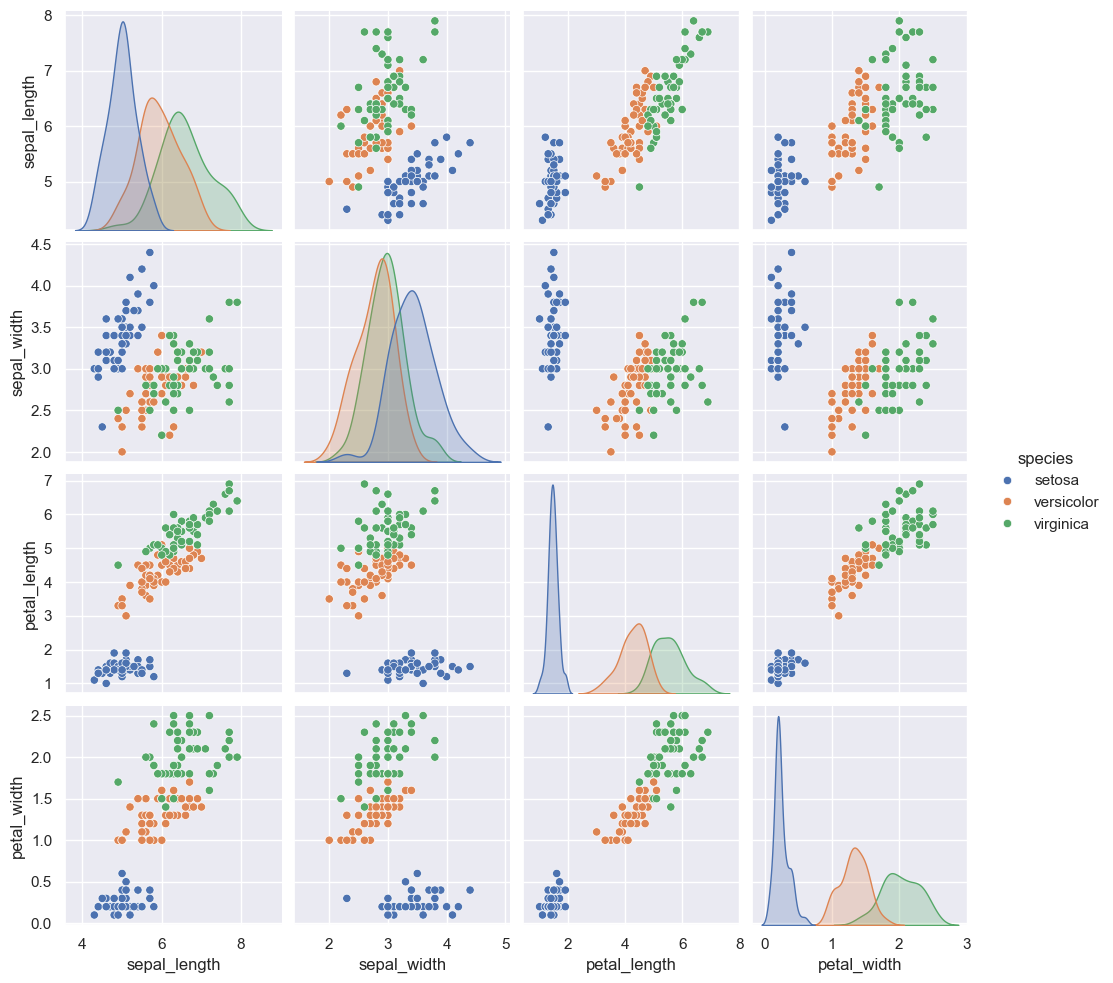

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
plt.show()

Of course, real data is often not as pretty as the `iris` dataset in the picture above. If the data have many attributes, displaying the matrix of all pairs, as in the picture above, is complicated, but it is often possible to draw at least the histograms of each of the attributes. These can at least tell us what the ranges of individual attributes are and if any values are often repeated.

For example, let's do a little analysis of the `winequality-white` file from the UCI machine learning repository. We can use `pandas` to show some basic statistics.

In [6]:
import pandas as pd

data = pd.read_csv('winequality-white.csv', delimiter=';')
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

The goal of this dataset is to predict the quality of the wine based on 12 measured physical quantities. The quality is evaluated on a scale of 0-10. From the above mentioned output we can immediately notice that only values from 3 to 9 occur in the data. How often do individual classes occur?

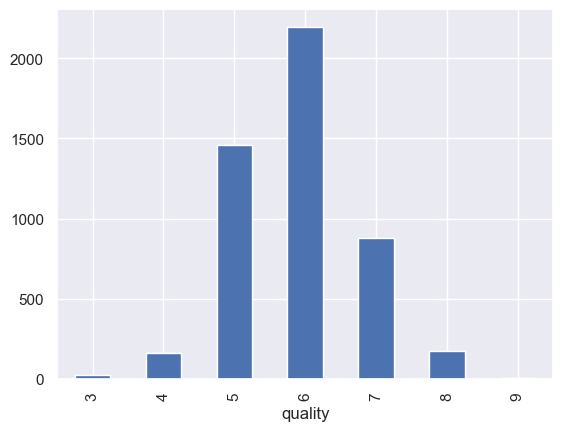

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


In [8]:
counts = data['quality'].value_counts(sort=False).sort_index()
counts.plot(kind='bar')
plt.show()
print(counts)

Even in this case, we can try to create the scatterplot matrix, as in the example with irises, and we will even see it after some (not too long) time.

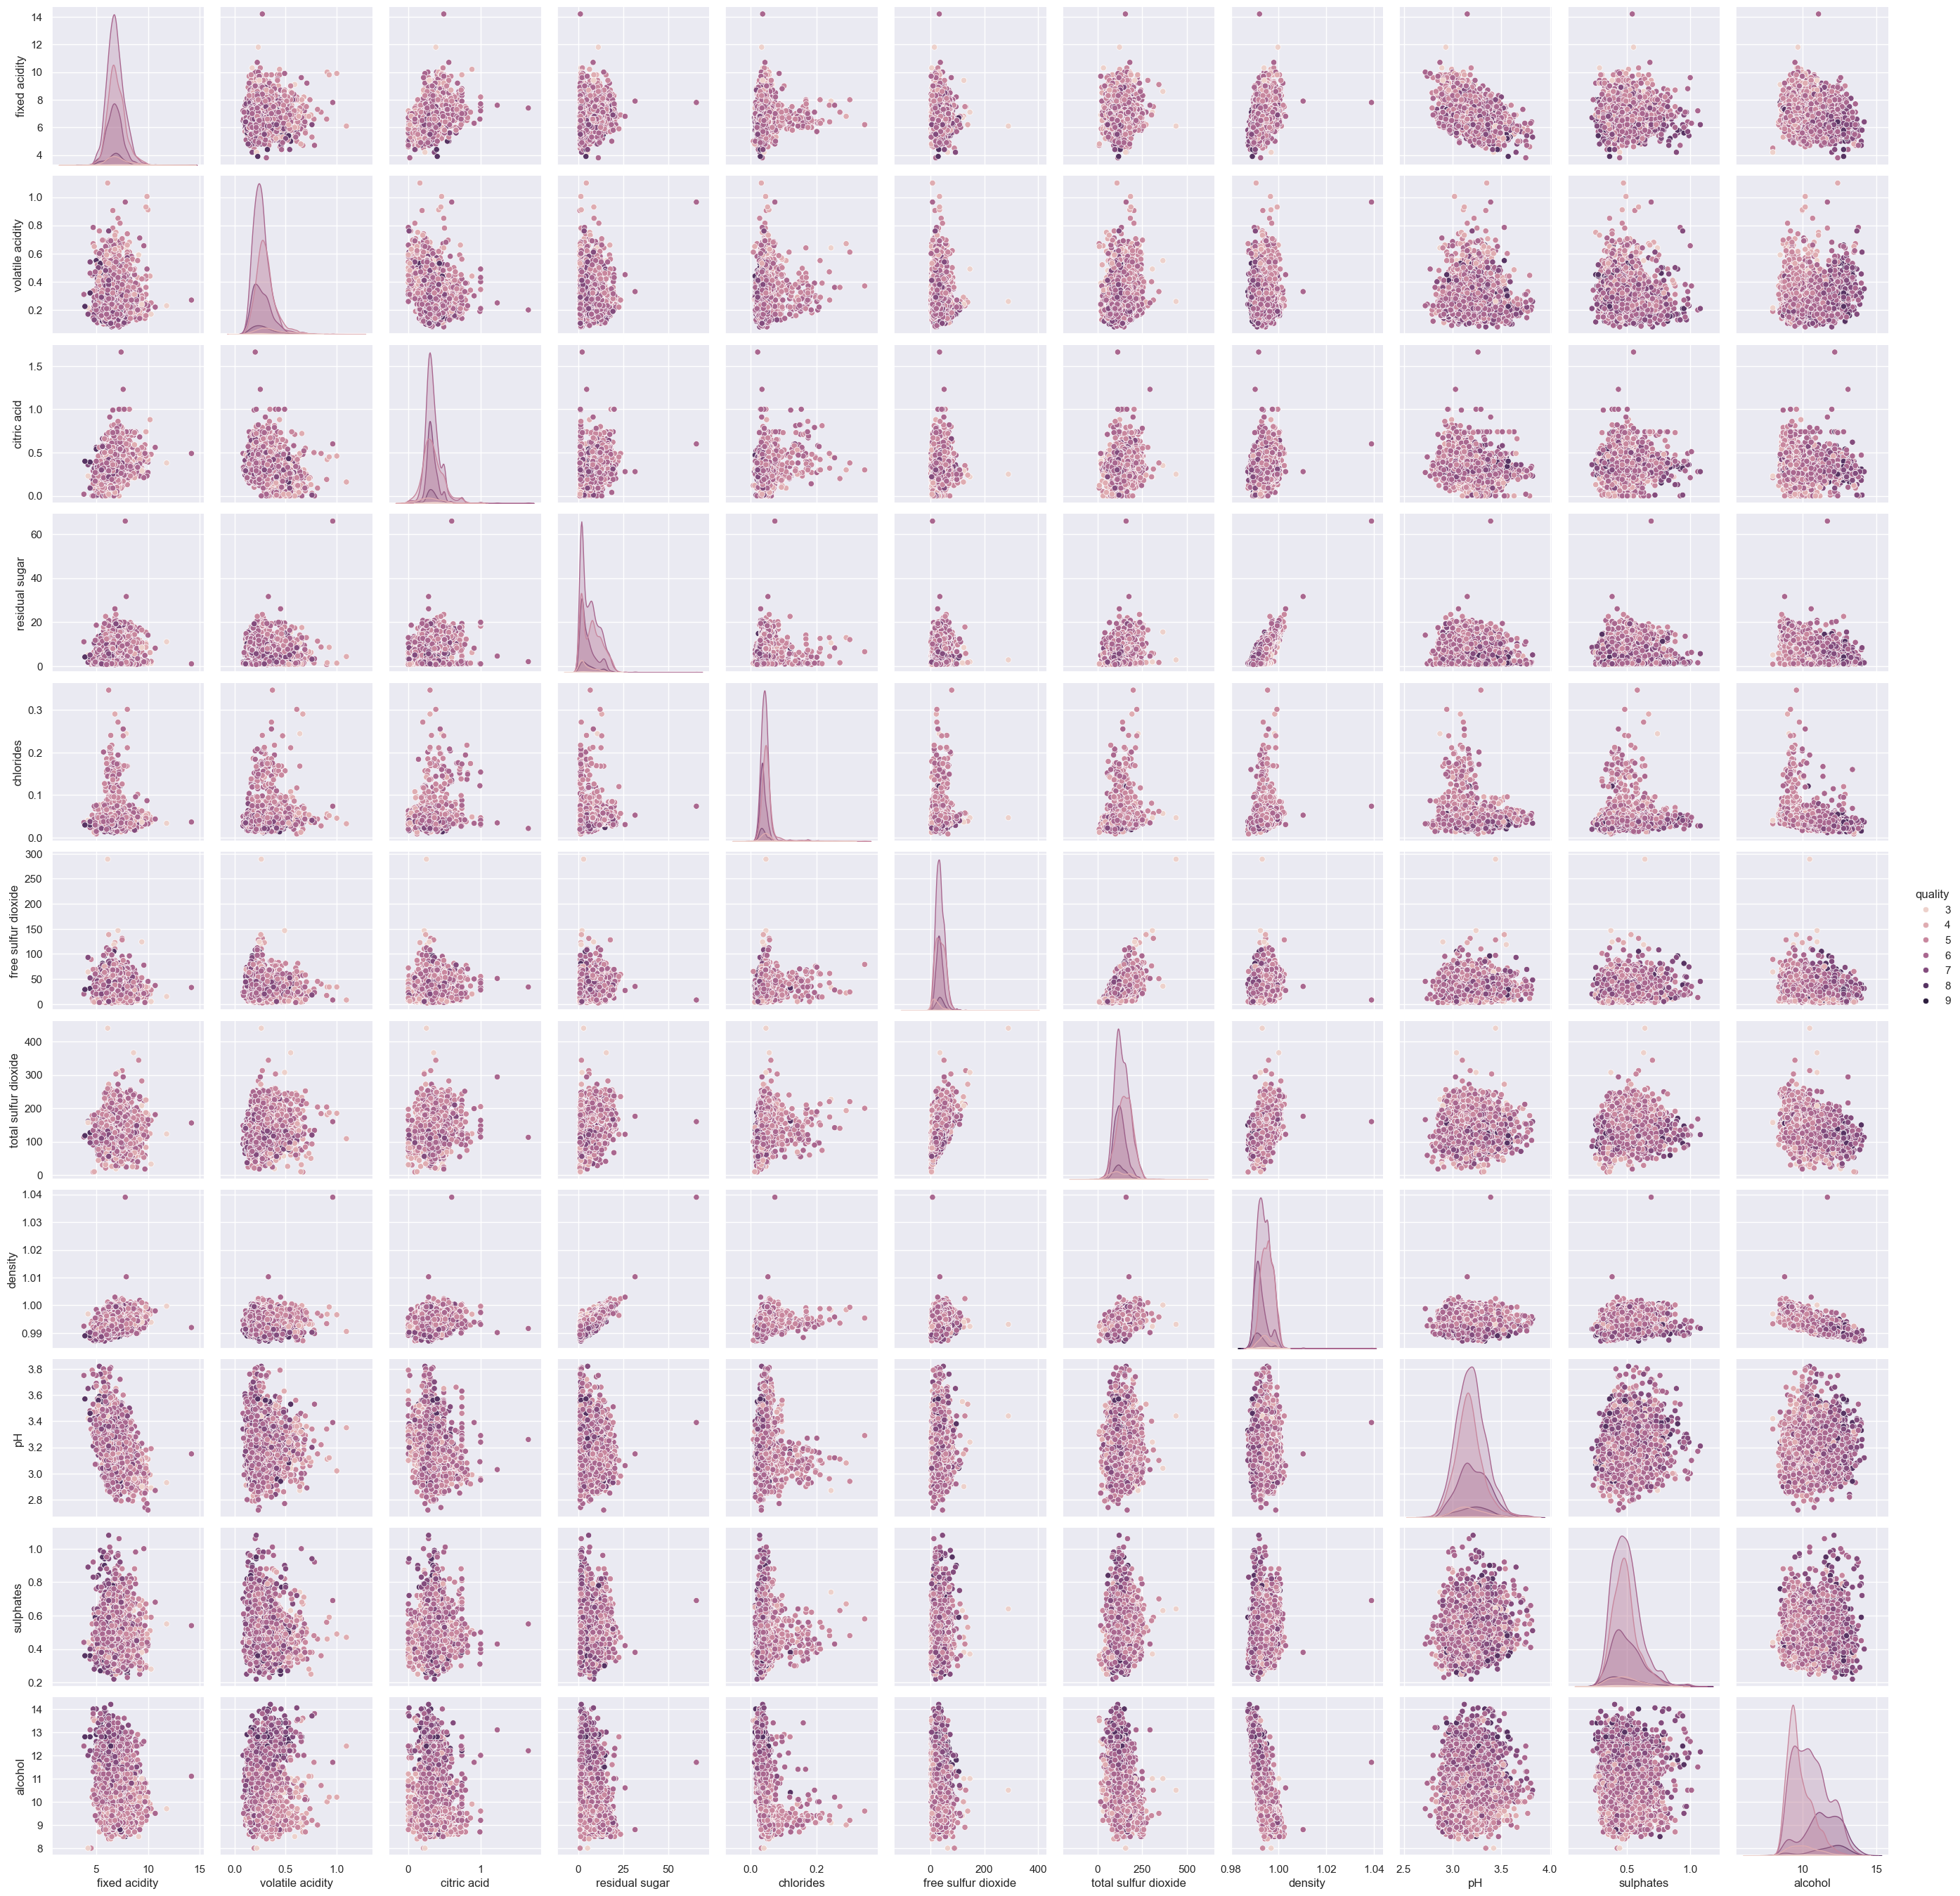

In [9]:
# znama vizualizace, tentokrat pro vetsi data
sns.pairplot(data, hue='quality')
plt.show()

We can also choose only some of the attributes.

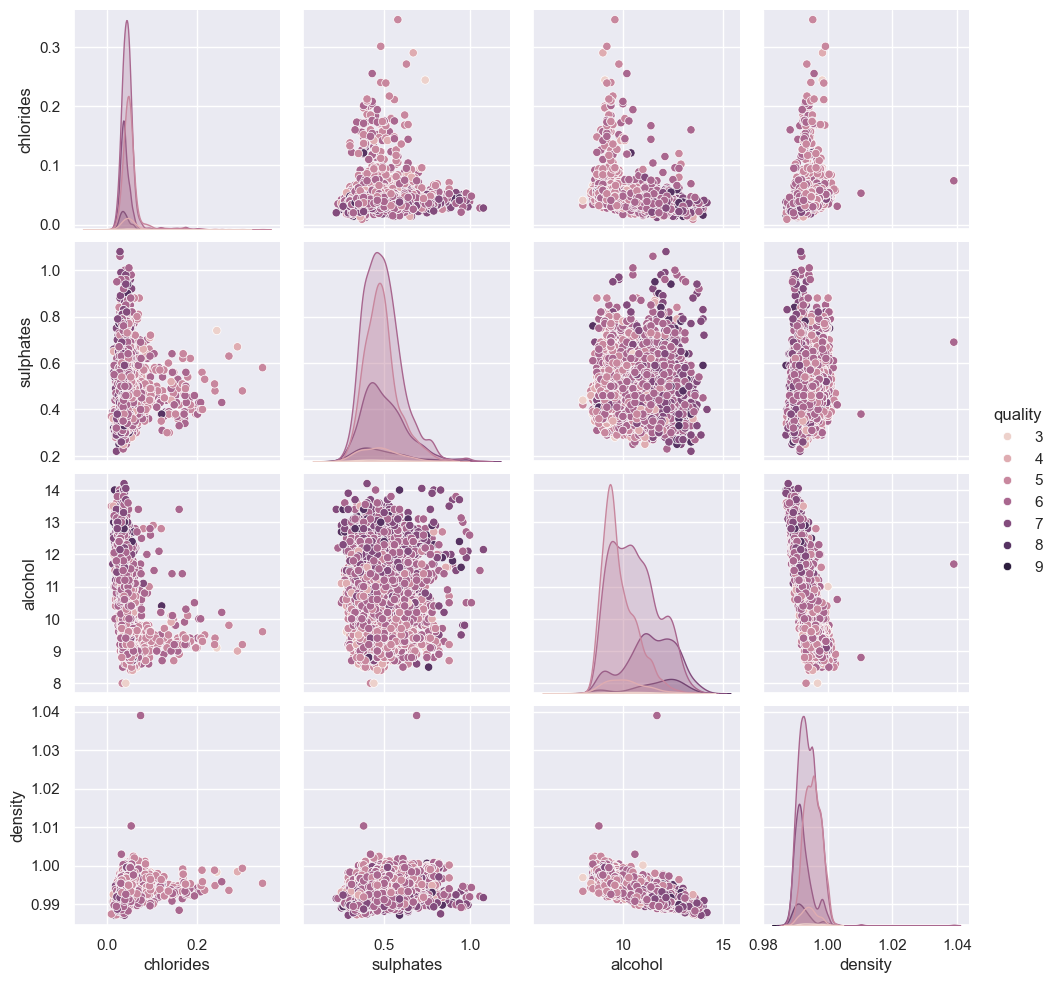

In [12]:
sns.pairplot(data, hue='quality', vars=['chlorides', 'sulphates', 'alcohol', 'density'])
plt.show()

Let us now evaluate the correlation of the attributes with the target class.

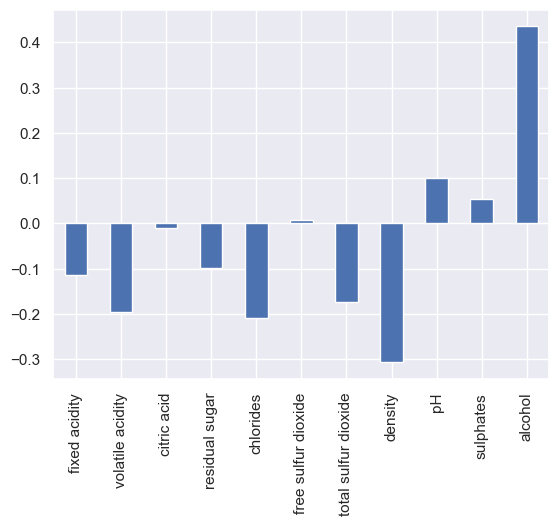

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

In [19]:
corr = data.corr()['quality'].drop('quality')
corr.plot(kind='bar')
plt.show()
print(corr)

data.corr()

We can also visualize the data using some data projection technique, such as PCA or t-SNE.

In [15]:
# zkusime jeste snizit dimenzionalitu dat
from sklearn import decomposition
from sklearn import manifold

attr = data.drop('quality', axis=1)

# pomoci PCA
clf = decomposition.PCA(n_components=2)
data2Dpca = clf.fit_transform(attr)

# a pomoci t-SNE
clf2 = manifold.TSNE(n_components=2)
data2Dtsne = clf2.fit_transform(attr)

C:\Users\marti\anaconda3\envs\apci\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\marti\anaconda3\envs\apci\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


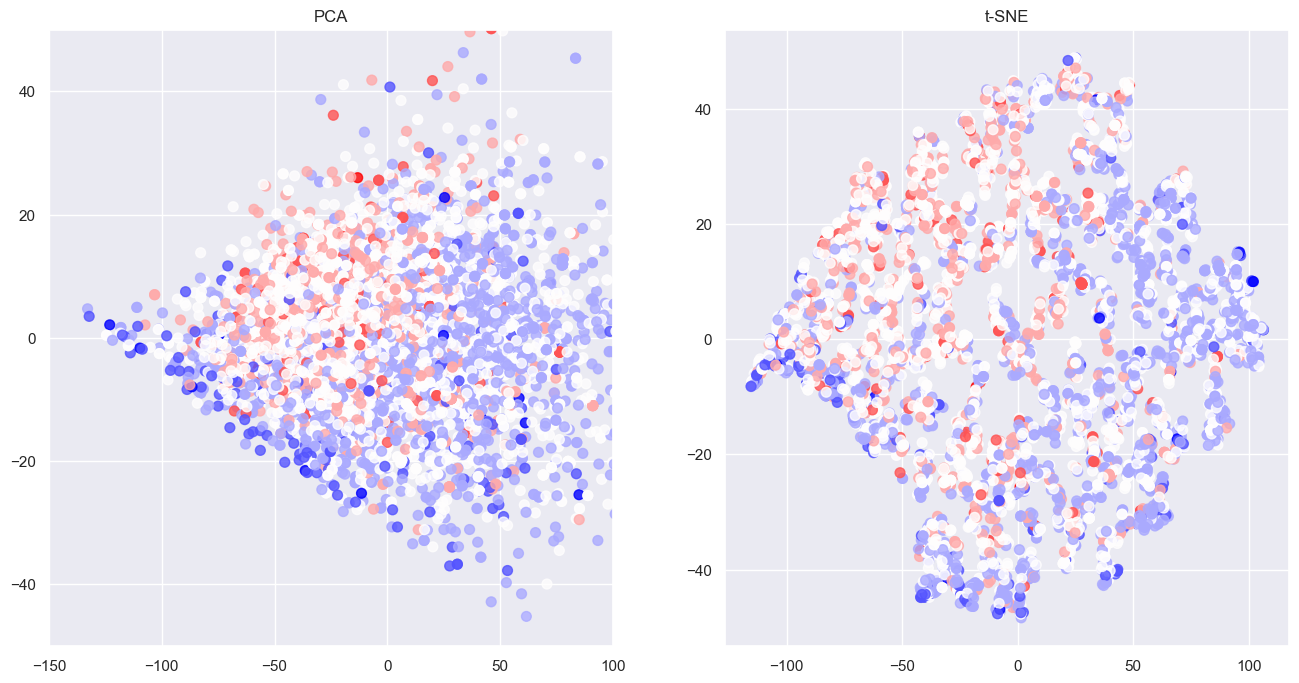

In [20]:
# nakreslime projekce pomoci PCA a pomoci t-SNE
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(data2Dpca[:, 0], data2Dpca[:, 1], c=data.quality, cmap=plt.get_cmap('bwr'), s=50, alpha=0.8)
plt.ylim([-50, 50])
plt.xlim([-150, 100])
plt.title('PCA')
plt.subplot(1,2,2)
plt.scatter(data2Dtsne[:, 0], data2Dtsne[:, 1], c=data.quality, cmap=plt.get_cmap('bwr'), s=50, alpha=0.8)
plt.title('t-SNE')
plt.show()

Let us show some additional useful visualizations. We mentioned the histograms of each of the attributes.

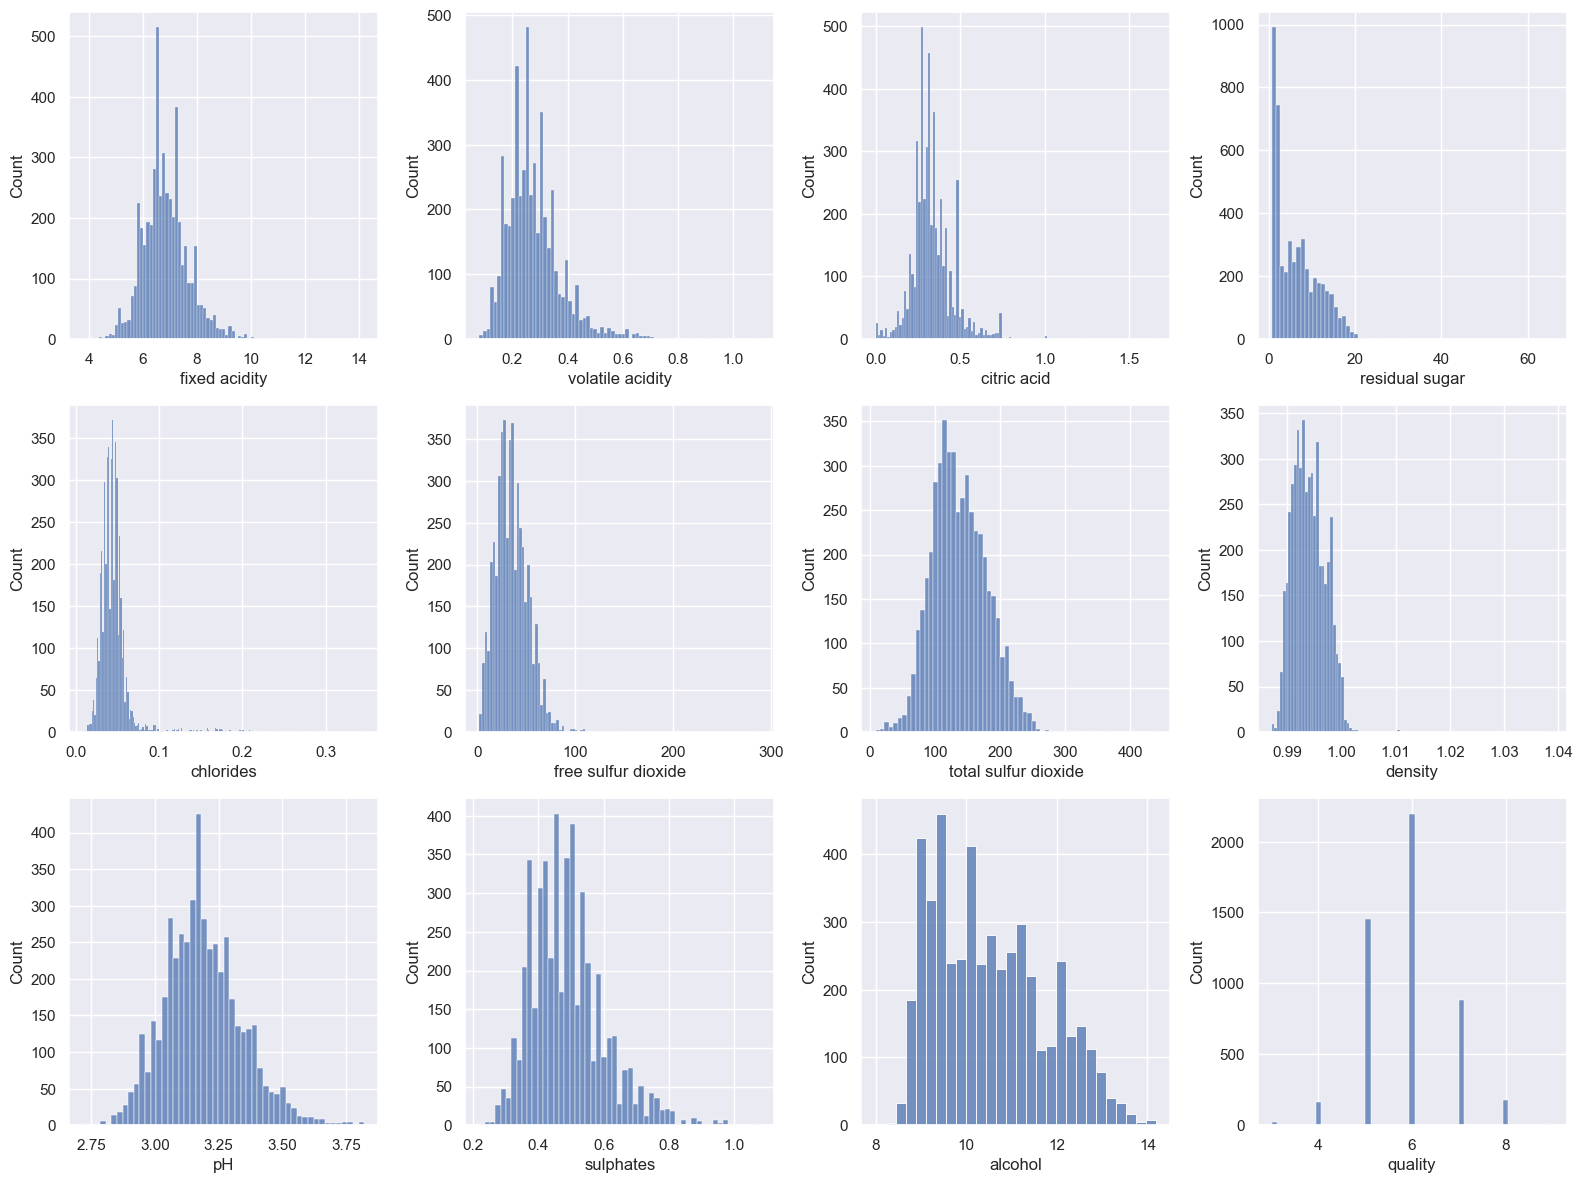

In [25]:
fig, axs = plt.subplots(3,4)
fig.set_size_inches(16,12)
axs = axs.ravel()
for col, ax in zip(data.columns.values, axs):
    sns.histplot(data[col], ax=ax)    

plt.tight_layout()
plt.show()

We found the largest correlation between the amount of alcohol and quality. Let's visualize it.

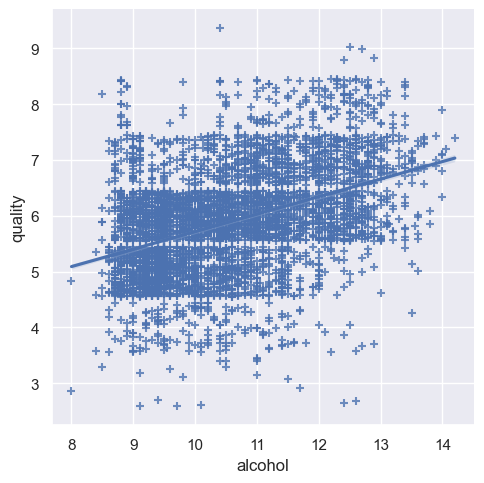

In [38]:
sns.lmplot(data, x='alcohol', y='quality', y_jitter=0.45, markers='+')
plt.show()

Let's try training some models and see how they work. We will try random forest classification and random forest regression. For similar problems, it is not very clear, which of them will work better.

In [34]:
import numpy as np
from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics

train_x, test_x, train_y, test_y = model_selection.train_test_split(attr, data['quality'], test_size=0.25, random_state=123)

clf = ensemble.RandomForestClassifier(n_estimators=100)
reg = ensemble.RandomForestRegressor(n_estimators=100)

clf.fit(train_x, train_y)
reg.fit(train_x, train_y)

clf_y = clf.predict(test_x)
reg_y = reg.predict(test_x)

# round the regression results
reg_y = np.round(reg_y).astype(int)
reg_y[reg_y<3] = 3
reg_y[reg_y>9] = 9

# print statistics
print('Classification accuracy: %.3f' % metrics.accuracy_score(test_y, clf_y))
print('Classification quadratic kappa: %.3f' % metrics.cohen_kappa_score(test_y, clf_y, weights='quadratic'))
print(metrics.classification_report(test_y, clf_y))
cm_clf = metrics.confusion_matrix(test_y, clf_y)
print(cm_clf)

print('Regression: %.3f' % metrics.accuracy_score(test_y, reg_y))
print('Regression quadratic kappa: %.3f' % metrics.cohen_kappa_score(test_y, reg_y, weights='quadratic'))
print(metrics.classification_report(test_y, reg_y))
cm_reg = metrics.confusion_matrix(test_y, reg_y)
print(cm_reg)

Classification accuracy: 0.676
Classification quadratic kappa: 0.643
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.70      0.18      0.29        38
           5       0.68      0.67      0.68       362
           6       0.68      0.78      0.72       574
           7       0.64      0.58      0.61       198
           8       0.89      0.35      0.50        46
           9       0.00      0.00      0.00         3

    accuracy                           0.68      1225
   macro avg       0.51      0.37      0.40      1225
weighted avg       0.68      0.68      0.67      1225

[[  0   0   1   3   0   0   0]
 [  0   7  19  12   0   0   0]
 [  0   1 244 114   3   0   0]
 [  0   2  83 446  43   0   0]
 [  0   0  10  71 115   2   0]
 [  0   0   0  12  18  16   0]
 [  0   0   0   2   1   0   0]]
Regression: 0.655
Regression quadratic kappa: 0.626
              precision    recall  f1-score   support

         

C:\Users\marti\anaconda3\envs\apci\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\anaconda3\envs\apci\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\anaconda3\envs\apci\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\m